In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# import data from previous wrangle and EDA notebooks
df_houses = pd.read_csv('data/houses.csv')
final_test_df = pd.read_csv('data/houses_test.csv')

In [4]:
df_houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1455,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,4,NaN,0,2,2010,WD,Normal,210000
1456,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,5,Shed,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_houses.drop(columns =['Id'], inplace=True)
Id = final_test_df['Id']
final_test_df.drop(columns =['Id'], inplace=True)

In [13]:
# Engeneer a few features

df_houses['Age']= df_houses['YrSold'] - df_houses['YearBuilt']
final_test_df['Age']= final_test_df['YrSold'] - final_test_df['YearBuilt']

df_houses['TotalSF']= df_houses['1stFlrSF'] + df_houses['2ndFlrSF'] + df_houses['TotalBsmtSF']
final_test_df['TotalSF']= final_test_df['1stFlrSF'] + final_test_df['2ndFlrSF'] + final_test_df['TotalBsmtSF']

df_houses['TotalBath']= df_houses['BsmtFullBath'] + df_houses['BsmtHalfBath'] + df_houses['FullBath'] + df_houses['FullBath']
final_test_df['TotalBath']= final_test_df['BsmtFullBath'] + final_test_df['BsmtHalfBath'] + final_test_df['FullBath'] + final_test_df['FullBath']


df_houses['TotalPorchSF']= df_houses['EnclosedPorch'] + df_houses['OpenPorchSF'] + df_houses['3SsnPorch'] + df_houses['ScreenPorch']  
final_test_df['TotalPorchSF']= final_test_df['EnclosedPorch'] + final_test_df['OpenPorchSF'] + final_test_df['3SsnPorch'] + final_test_df['ScreenPorch']  

<Figure size 720x720 with 0 Axes>

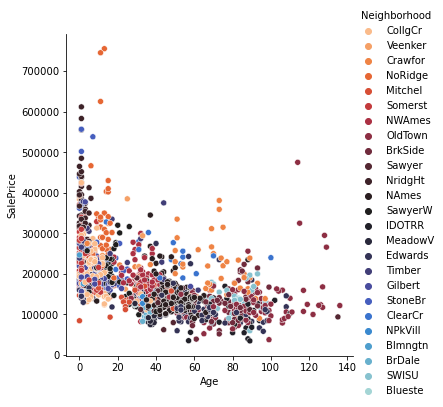

In [23]:
fig = plt.figure(figsize=(10,10),)
ax = sns.relplot(x='Age', y='SalePrice', data=df_houses, hue='Neighborhood', palette='icefire_r')
plt.show()

<Figure size 864x576 with 0 Axes>

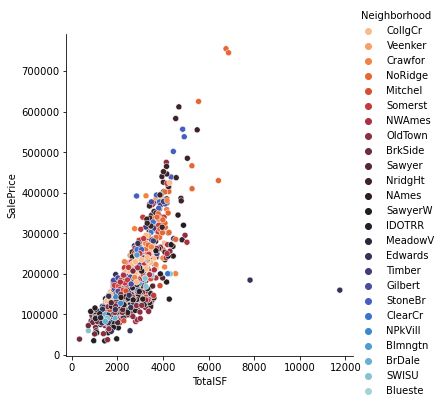

In [11]:
fig = plt.figure(figsize=(12,8),)
ax = sns.relplot(x='TotalSF', y='SalePrice', data=df_houses, hue='Neighborhood', palette='icefire_r')

<Figure size 864x576 with 0 Axes>

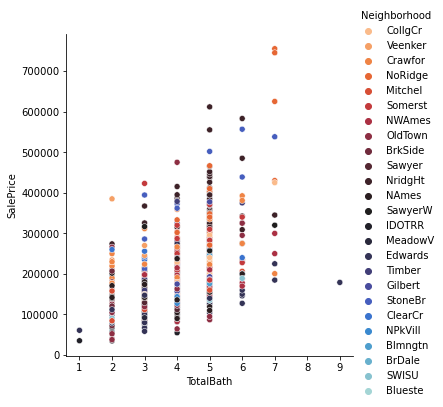

In [12]:
fig = plt.figure(figsize=(12,8),)
ax = sns.relplot(x='TotalBath', y='SalePrice', data=df_houses, hue='Neighborhood', palette='icefire_r')

<Figure size 864x576 with 0 Axes>

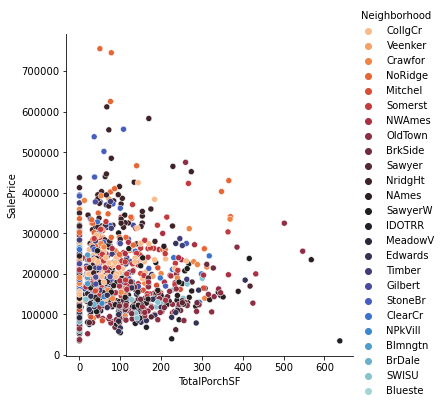

In [14]:
fig = plt.figure(figsize=(12,8),)
ax = sns.relplot(x='TotalPorchSF', y='SalePrice', data=df_houses, hue='Neighborhood', palette='icefire_r')

In [6]:
#split numeric features
df_houses_numeric = df_houses.select_dtypes([np.number])
df_houses_numeric = df_houses_numeric.drop(columns=['SalePrice'])
houses_num_col = df_houses_numeric.columns

In [7]:
df_houses_numeric.shape

(1459, 55)

In [8]:
df_houses_numeric.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscVal          0
MoSold           0
YrSold           0
Age              0
TotalSF     

In [9]:
# examin outliers

q5, q95 = df_houses_numeric.quantile(.005, axis=0), df_houses_numeric.quantile(.995, axis=0)
iqr = q95 - q5


In [10]:
q95

MSSubClass         190.00
LotFrontage        152.71
LotArea          53423.67
OverallQual         10.00
OverallCond          9.00
YearBuilt         2009.00
YearRemodAdd      2009.00
MasVnrArea         959.63
ExterQual            5.00
ExterCond            4.00
BsmtQual             5.00
BsmtCond             4.00
BsmtExposure         4.00
BsmtFinType1         6.00
BsmtFinSF1        1753.66
BsmtFinType2         6.00
BsmtFinSF2        1049.46
BsmtUnfSF         1932.39
TotalBsmtSF       2430.08
HeatingQC            5.00
1stFlrSF          2434.43
2ndFlrSF          1533.65
LowQualFinSF       457.63
GrLivArea         3431.92
BsmtFullBath         2.00
BsmtHalfBath         1.00
FullBath             3.00
HalfBath             2.00
BedroomAbvGr         5.71
KitchenAbvGr         2.00
KitchenQual          5.00
TotRmsAbvGrd        12.00
Fireplaces           2.00
FireplaceQu          5.00
GarageYrBlt       2009.00
GarageFinish         3.00
GarageCars           3.00
GarageArea        1064.36
GarageQual  

In [11]:
# save outliers to be removed later
drop_out = df_houses_numeric[(df_houses_numeric > (q95 + iqr * 1.5)).any(axis=1)]

drop_out


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,Age,TotalSF,TotalBath,TotalPorchSF
197,75,174.0,25419,8,4,1918,1990,0.0,4,4,...,512,5,5,0,3,2006,88,4080,6,568
249,50,60.0,159000,6,7,1958,2006,472.0,4,3,...,0,0,0,500,6,2007,49,3588,5,98
313,20,150.0,215245,7,5,1965,1965,0.0,3,3,...,0,0,0,0,6,2009,44,4172,6,0
335,190,60.0,164660,5,6,1965,1965,0.0,3,3,...,0,0,0,700,8,2008,43,3285,6,0
346,20,60.0,12772,6,8,1960,1998,0.0,3,4,...,0,0,0,15500,4,2007,47,1916,2,0
810,20,78.0,10140,6,6,1974,1999,99.0,3,3,...,648,2,5,0,1,2006,32,2349,3,0
1170,80,76.0,9880,6,6,1977,1977,0.0,3,3,...,576,4,5,0,7,2008,31,2214,3,0
1182,60,160.0,15623,10,5,1996,1996,0.0,4,3,...,555,5,4,0,7,2007,11,6872,7,78
1230,90,60.0,18890,5,5,1977,1977,1.0,3,3,...,0,0,0,8300,8,2007,30,3981,4,169
1298,60,313.0,63887,10,5,2008,2008,796.0,5,3,...,480,4,0,0,1,2008,0,11752,6,292


In [12]:
drop_out.shape

(12, 55)

In [13]:
#drop_price = df_houses.SalePrice[(df_houses_numeric > (q95 + iqr * 1.5)).any(axis=1)]


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


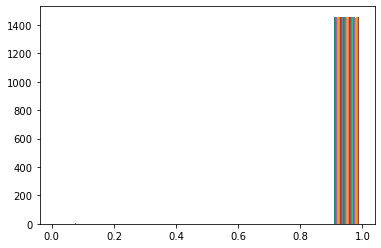

In [14]:
plt.hist((df_houses_numeric <= (q95 + iqr * 1.5)));

In [15]:
#drop outliers from train only

df_houses.drop(drop_out.index, inplace=True)

In [16]:
df_houses.columns.difference(final_test_df.columns)

Index(['SalePrice'], dtype='object')

In [17]:
# make dummies for catagorical features
df_train = pd.get_dummies(df_houses)
df_test = pd.get_dummies(final_test_df)

In [18]:

dif_test = df_train.columns.difference(df_test.columns).values
dif_test

array(['Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other',
       'Heating_Floor', 'Heating_OthW', 'HouseStyle_2.5Fin',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'SalePrice',
       'Utilities_NoSeWa'], dtype=object)

In [19]:
# not all dummie features in both sets. We'll fill with 0s to match shapes
df_test[dif_test] = 0

In [20]:
dif_train = df_test.columns.difference(df_train.columns).values
df_train[dif_train] = 0

In [21]:
#remove sales price column from test it got added on with the numeric values
df_test= df_test.drop(columns=['SalePrice'])

In [22]:
#double check the dataframe
df_houses.isna().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
               ..
SalePrice       0
Age             0
TotalSF         0
TotalBath       0
TotalPorchSF    0
Length: 84, dtype: int64

In [23]:
df_train.shape

(1447, 238)

In [24]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MiscFeature_Gar2
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,...,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.0
mean,56.796821,67.910159,10098.780926,6.093988,5.574292,1971.252937,1984.845888,102.970974,3.395301,3.082239,...,0.083621,0.002073,0.867312,0.068417,0.002764,0.007602,0.013822,0.821700,0.085695,0.0
std,42.287041,21.074332,6115.802072,1.379362,1.113156,30.263817,20.682722,180.168744,0.573678,0.350078,...,0.276915,0.045502,0.339355,0.252548,0.052522,0.086887,0.116791,0.382897,0.280009,0.0
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,50.000000,63.000000,9439.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,70.000000,79.000000,11506.000000,7.000000,6.000000,2000.500000,2004.000000,164.500000,4.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,190.000000,313.000000,115149.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [25]:
df_test.shape

(1459, 237)

In [26]:
# split into train and test
X = df_train.drop("SalePrice", axis = 1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [27]:
# scale numeric features

from sklearn.preprocessing import RobustScaler  
scaler = RobustScaler ()

X_train = scaler.fit_transform(X_train[houses_num_col])

# test is transform only
X_test = scaler.transform(X_test[houses_num_col])

In [30]:
#start with a basic regression


model1 = LinearRegression()

model1.fit(X_train, y_train)

print('cv_score', np.mean(cross_val_score(model1, X_train, y_train, cv=5)))

y_pred = model1.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2 score:', r2_score(y_test, y_pred))

cv_score 0.8333676948248074
MAE: 18578.033147769765
MSE: 837879556.1915588
RMSE: 28946.14924634292
R2 score: 0.8721932396501691


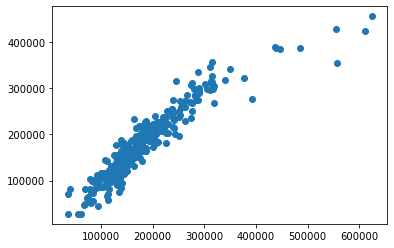

In [31]:
#check out the odd results
plt.scatter(y_test, y_pred)

In [32]:
y_dif = np.abs(y_test-y_pred )
y_dif.sort_values(ascending=False)[0:10]

1046    201061.884532
898     188421.116076
1169    169320.018732
440     127159.598522
1181    116795.999887
798      96998.578100
70       71671.212304
1211     70186.078763
527      60575.343686
970      60528.445504
Name: SalePrice, dtype: float64